In [2]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np
from specutils import Spectrum, SpectralRegion
from specutils.manipulation import extract_region

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [3]:
path = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/"

Processing DSpec_0336p0010.txt


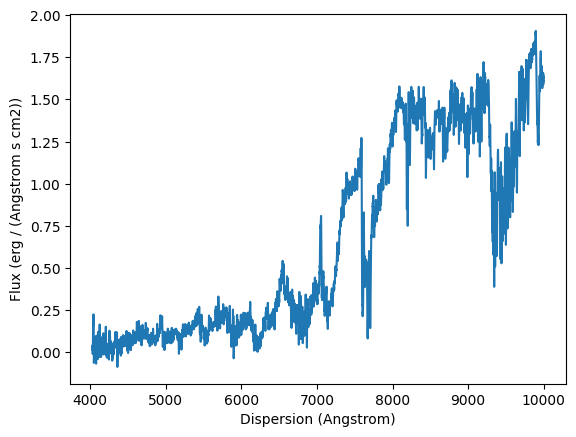

DSpec_0336p0010.txt is plottable

Processing DSpec_0723+0316.txt


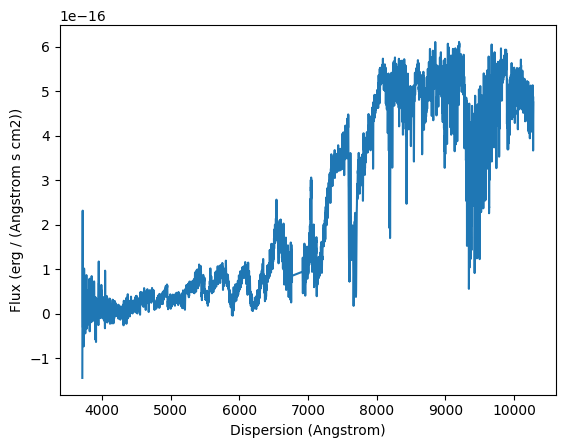

DSpec_0723+0316.txt is plottable

Processing DSpec_1941m0208.txt


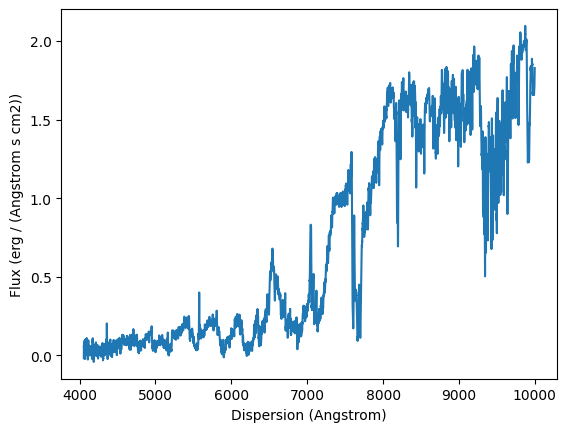

DSpec_1941m0208.txt is plottable

Processing DSpec_0130m1047.txt


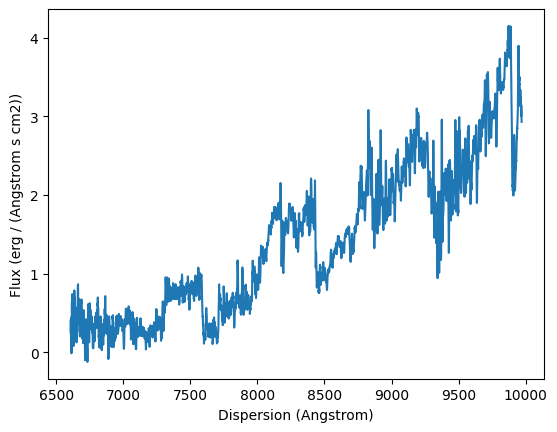

DSpec_0130m1047.txt is plottable

Processing DSpec_0043p2212.txt


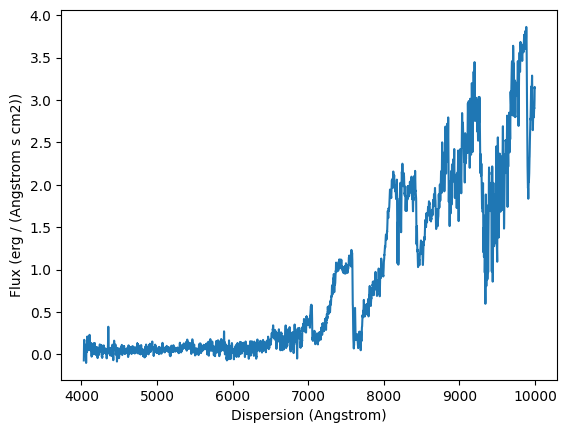

DSpec_0043p2212.txt is plottable

Processing DSpec_0559-2903.txt


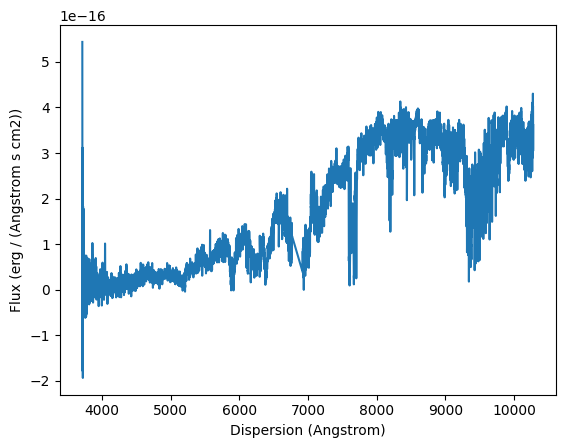

DSpec_0559-2903.txt is plottable

Processing DSpec_2134p7132.txt


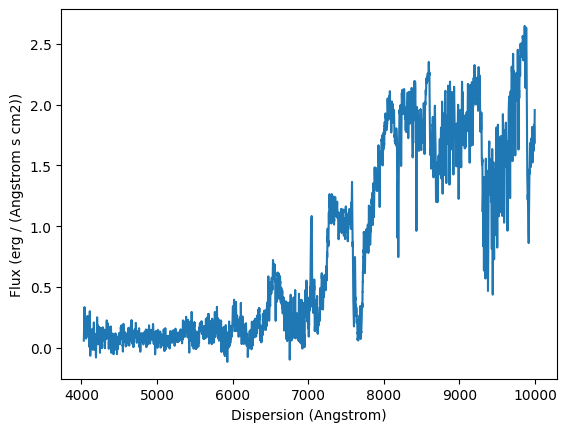

DSpec_2134p7132.txt is plottable

Processing DSpec_1434p2202.txt


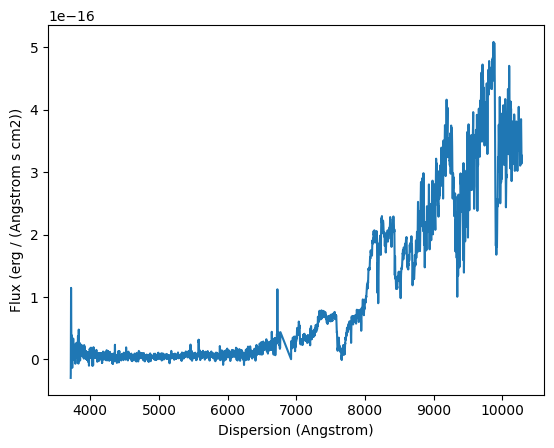

DSpec_1434p2202.txt is plottable

Processing DSpec_1158p0447.txt


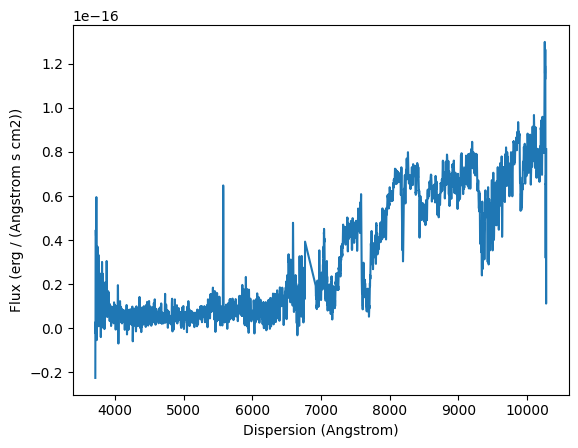

DSpec_1158p0447.txt is plottable

Processing DSpec_1256-1408.txt


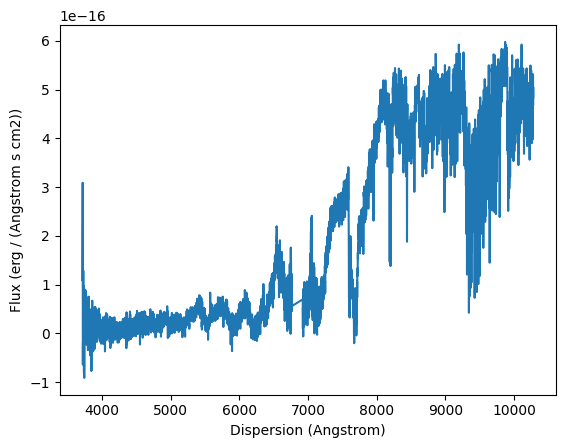

DSpec_1256-1408.txt is plottable

Processing DSpec_1425p7102.txt


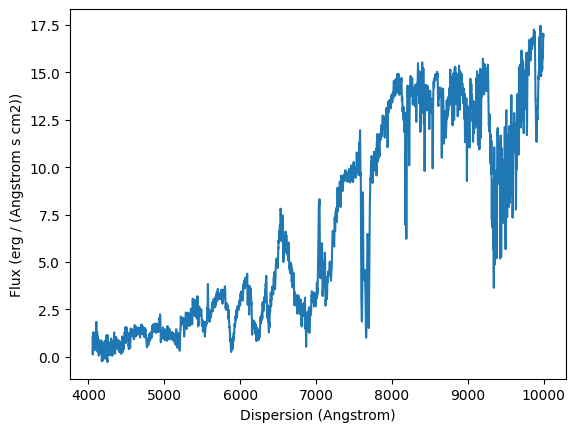

DSpec_1425p7102.txt is plottable

Processing DSpec_1416+1348.txt


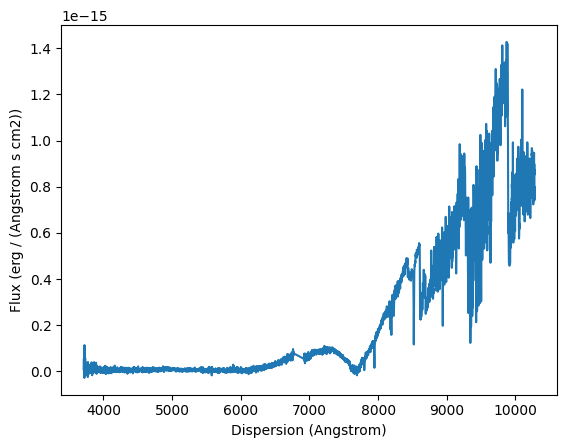

DSpec_1416+1348.txt is plottable

Processing DSpec_1244p1024.txt


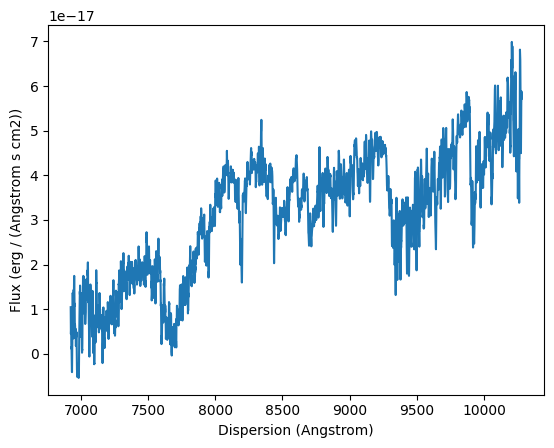

DSpec_1244p1024.txt is plottable

Processing DSpec_1452p2723.txt


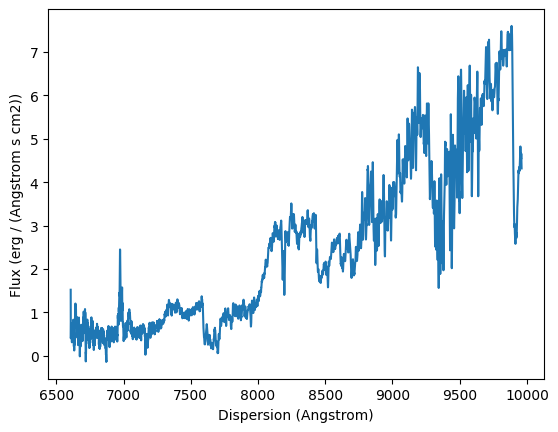

DSpec_1452p2723.txt is plottable

Processing DSpec_0822+1700.txt


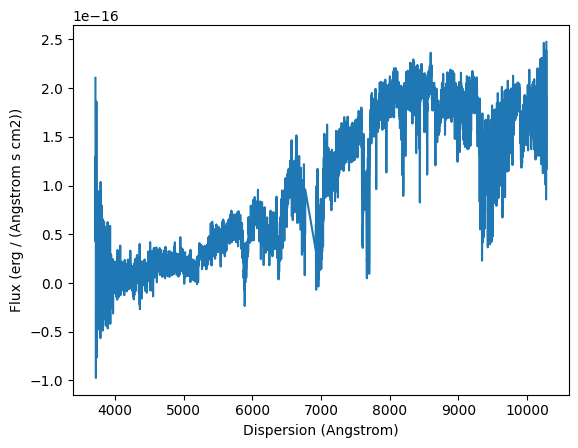

DSpec_0822+1700.txt is plottable



In [13]:
import numpy as np
from astropy.nddata import StdDevUncertainty
import astropy.units as u
from specutils import Spectrum
from specutils.manipulation import snr_threshold

for filename in os.listdir(path):
    if "DSPEC" in filename.upper():
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        wavelength = data[:, 0] * u.AA
        flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)
        # uncertainty_array = np.abs(flux) * 0.10
             
        # Create Spectrum object with uncertainty
        spectrum = Spectrum(
            flux=flux,
            spectral_axis=wavelength,
            # uncertainty=StdDevUncertainty(uncertainty_array)
        )
        if check_spectrum_plottable(spectrum, show_plot=True):
            print(f"{filename} is plottable\n")

Processing DSpec_0336p0010.txt


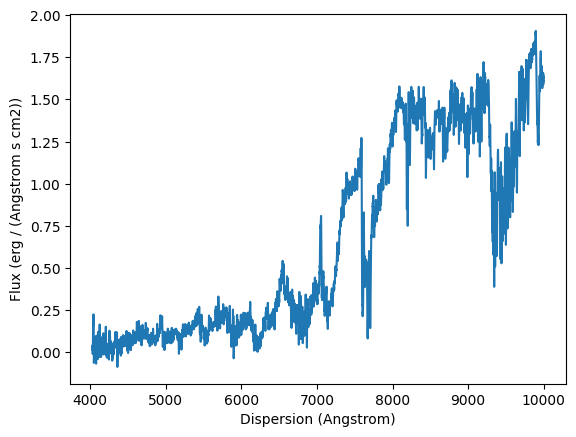

DSpec_0336p0010.txt is plottable

Processing DSpec_0723+0316.txt


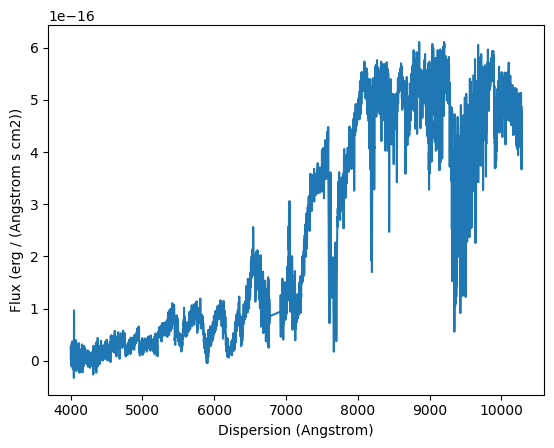

DSpec_0723+0316.txt is plottable

Processing DSpec_1941m0208.txt


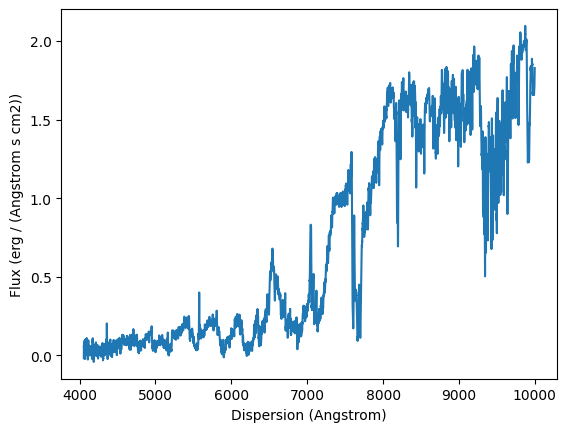

DSpec_1941m0208.txt is plottable

Processing DSpec_0130m1047.txt


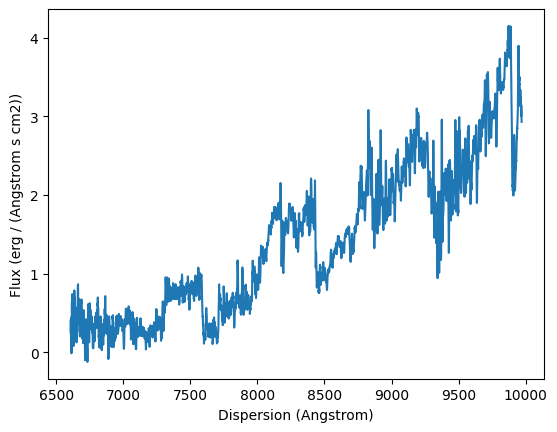

DSpec_0130m1047.txt is plottable

Processing DSpec_0043p2212.txt


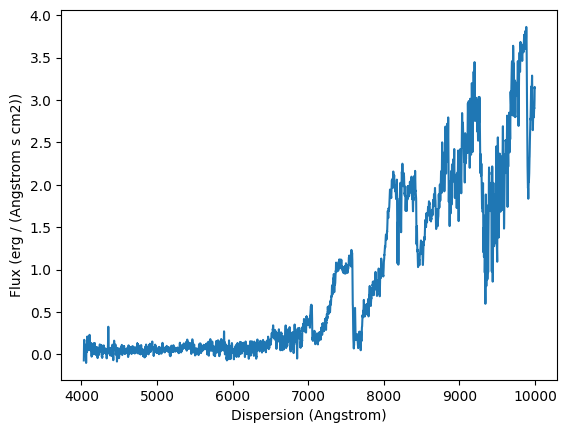

DSpec_0043p2212.txt is plottable

Processing DSpec_0559-2903.txt


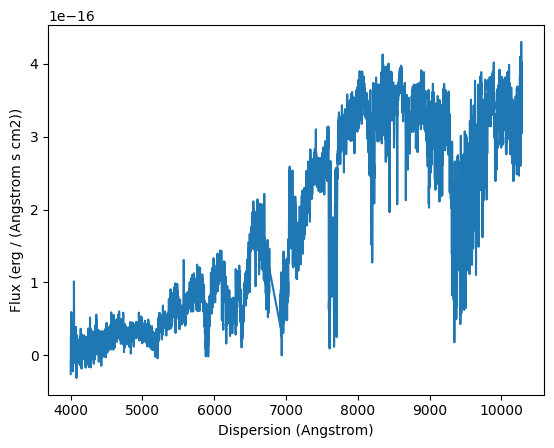

DSpec_0559-2903.txt is plottable

Processing DSpec_2134p7132.txt


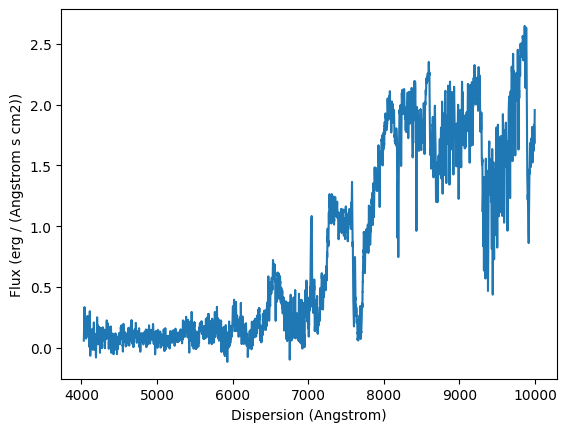

DSpec_2134p7132.txt is plottable

Processing DSpec_1434p2202.txt


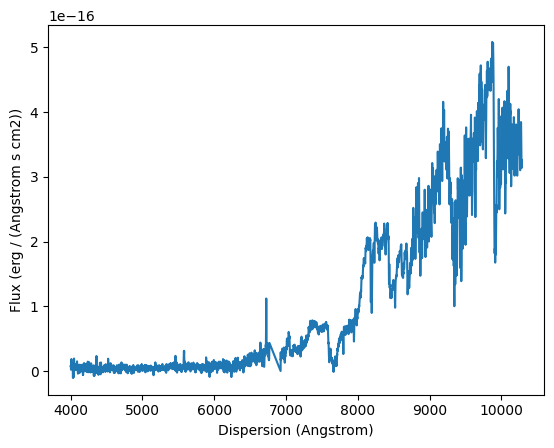

DSpec_1434p2202.txt is plottable

Processing DSpec_1158p0447.txt


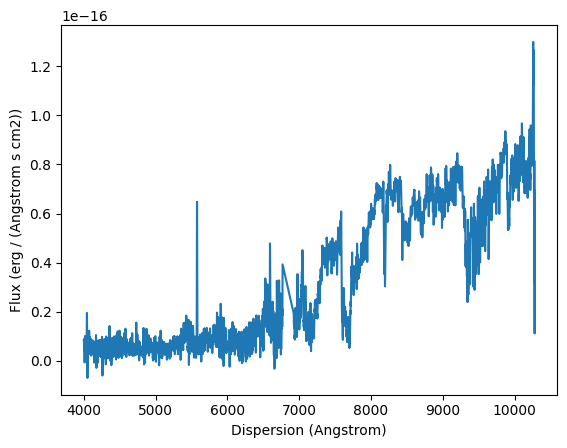

DSpec_1158p0447.txt is plottable

Processing DSpec_1256-1408.txt


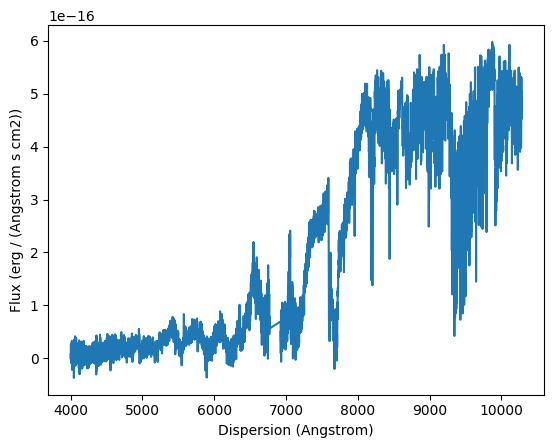

DSpec_1256-1408.txt is plottable

Processing DSpec_1425p7102.txt


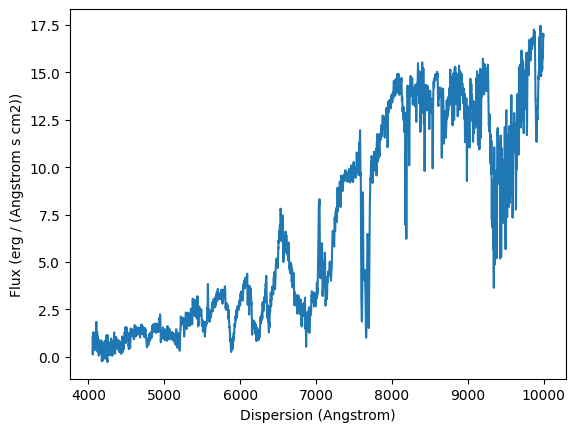

DSpec_1425p7102.txt is plottable

Processing DSpec_1416+1348.txt


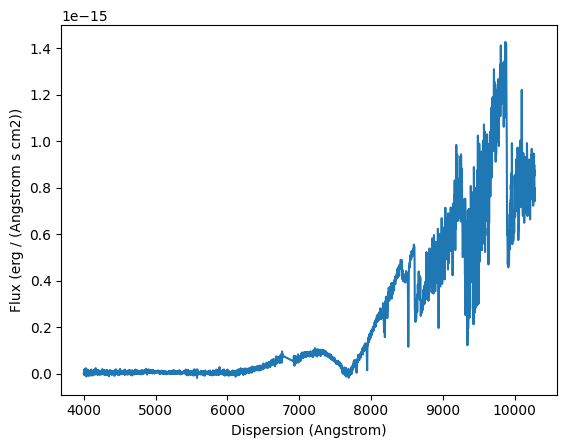

DSpec_1416+1348.txt is plottable

Processing DSpec_1244p1024.txt


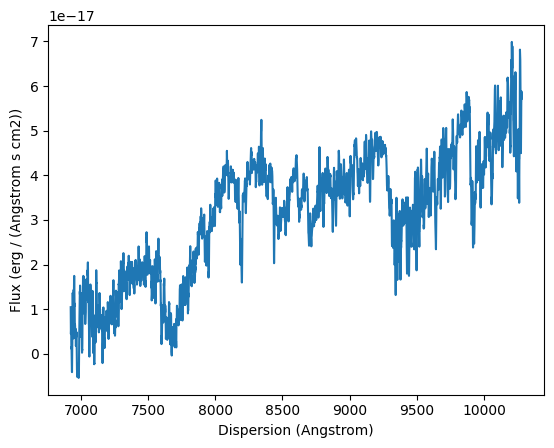

DSpec_1244p1024.txt is plottable

Processing DSpec_1452p2723.txt


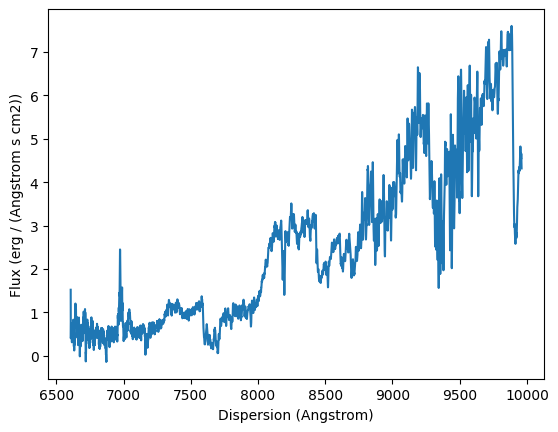

DSpec_1452p2723.txt is plottable

Processing DSpec_0822+1700.txt


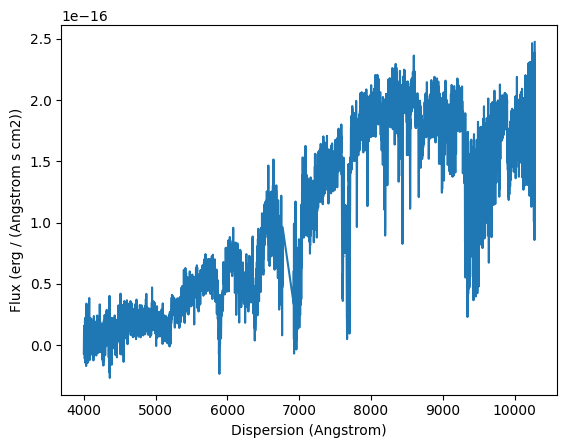

DSpec_0822+1700.txt is plottable

Ploted files: 15
Failed files: 0


In [6]:
# Process source with DSpec spectra
file_plotted = 0
file_failed = 0

for filename in os.listdir(path):
    if "DSPEC" in filename.upper():
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        wavelength = data[:, 0] * u.AA
        flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)

        # Create spectrum object
        spectrum = Spectrum(flux=flux, spectral_axis=wavelength)
        spectrum = extract_region(spectrum, SpectralRegion(4000*u.AA, 15000*u.AA))

        # check spectrum plot
        if (check_spectrum_plottable(spectrum, show_plot=True)):
            print(f"{filename} is plottable\n")
            file_plotted += 1
        else:
            file_failed += 1

print(f"Ploted files: {file_plotted}")
print(f"Failed files: {file_failed}")